In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
from scipy import stats, misc

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<font size = "6">
<b>Support Vector Machine</b>
</font>

Table of Contents
<div id="toc"></div>

# 1. Classification (Linear)

- Figure out, autonomously, which category (or class) an unknown item should be categorized into

- Number of categories / classes

    - Binary: 2 different classes
    
    - Multiclass : more than 2 classes
    
- Feature

    - The measurable parts that make up the unknown item (or the information you have available to categorize)

# 2. Illustrative Example

- <font color='green'>Binary classification</font>
    - $C_1$ and $C_2$
    
- Features
    - The coordinate of the unknown animal $i$ in the zoo
    
$$x = \begin{bmatrix}x_1 \\ x_2 \end{bmatrix}$$

<br>
<img src="./image_files/SVM001.jpg", width = 350>
<br>

- Is it possible to distinguish between $C_1$ and $C_2$ by its coordinates on a map of the zoo?

- We need to find a separating hyperplane (or a line in 2D)

$$ \omega_1x_1 + \omega_2x_2 + \omega_0 = 0 $$

$$ \begin{bmatrix}\omega_1 & \omega_2 \end{bmatrix}
\begin{bmatrix}x_1 \\ x_2 \end{bmatrix} + \omega_0 = 0$$

$$ \omega^Tx + \omega_0 = 0$$


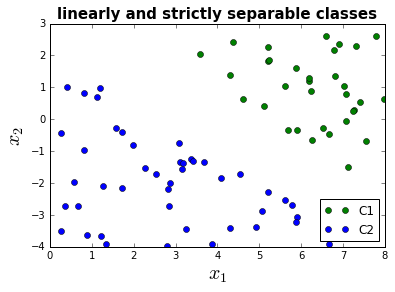

In [41]:
#training data gerneration

x1 = 8*np.random.rand(100, 1)
x2 = 7*np.random.rand(100, 1) - 4

g0 = 0.8*x1 + x2 - 3
g1 = g0 - 1
g2 = g0 + 1

C1 = np.where(g1 >= 0)[0]
C2 = np.where(g2 < 0)[0]

plt.plot(x1[C1], x2[C1], 'go', x1[C2], x2[C2], 'bo')
plt.title('linearly and strictly separable classes', fontweight = 'bold', fontsize = 15)
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(('C1','C2'), loc = 4)
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()


- Given:
    - Hyperplane defined by $\omega$ and $\omega_0$
    - Animals coordinates (or features) $x$
    

- Decision making:

$$ \omega^Tx + \omega_0 >0 \implies x \; \text{belongs to} \; C_1$$

$$ \omega^Tx + \omega_0 <0 \implies x \; \text{belongs to} \; C_2$$



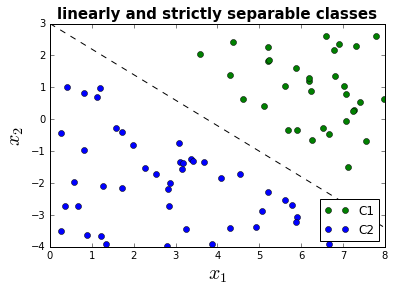

In [42]:
## Plot the blue and the green
#  see how data are generated

xp = np.array([x_cont/100.0 for x_cont in range(0,801)])

yp = - 0.8*xp + 3
plt.plot(x1[C1], x2[C1], 'go', x1[C2], x2[C2], 'bo')
plt.plot(xp, yp, '--k')
plt.title('linearly and strictly separable classes', fontweight = 'bold', fontsize = 15)
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(('C1','C2'), loc = 4)
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()


- Find $\omega$ and $\omega_0$ such that $x$ given $\omega^Tx + \omega_0 = 0$

    or


- Find $\omega$ and $\omega_0$ such that $x\in C_1$ given $\omega^Tx + \omega_0 >1$ and $x\in C_2$ given $\omega^Tx + \omega_0 < -1$

$$ 
\begin{align*}
\;&\omega^Tx + \omega_0 > b \\ 
\Longleftrightarrow \;&\frac{\omega^T}{b}x + \frac{\omega_0}{b} > 1 \\
\Longleftrightarrow \;&\omega'^Tx + \omega'_0 > 1
\end{align*}$$
- Same problem if strictly separable

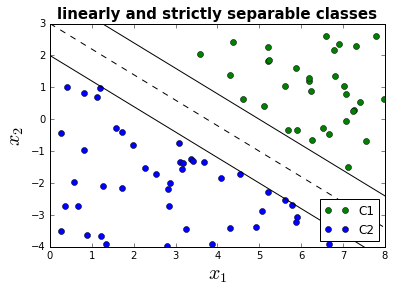

In [43]:
## Plot the blue and the red
#  see how data are generated

xp = np.array([x_cont/100.0 for x_cont in range(0,801)])

yp = - 0.8*xp + 3
y1 = yp - 1
y2 = yp + 1

plt.plot(x1[C1], x2[C1], 'go', x1[C2], x2[C2], 'bo')
plt.plot(xp, yp, '--k')
plt.plot(xp, y1, '-k')
plt.plot(xp, y2, '-k')
plt.title('linearly and strictly separable classes', fontweight = 'bold', fontsize = 15)
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(('C1','C2'), loc = 4)
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

## LP Formulation 1  
- $n \;(=2)$ features

- $m = N + M$ data points in training set

$$ x^{(i)} = \begin{bmatrix} x^{(i)}_1 \\ x^{(i)}_2 \end{bmatrix}$$

- $N$ belongs to $C_1$ in training set

- $M$ belongs to $C_2$ in training set

- $\omega$ and $\omega_0$ are the unknown variables

<br>
$$\begin{align*} \text{minimize} \quad
& \text{something} \\ \\
\text{subject to} \quad
& \begin{cases}
\omega^Tx^{(1)} + \omega_0 \geq1\\
\omega^Tx^{(2)} + \omega_0 \geq1\\
 \quad  \quad \vdots \\
\omega^Tx^{(N)} + \omega_0 \geq1\\
\end{cases} \\
& \begin{cases}
\omega^Tx^{(N+1)} + \omega_0 \leq{-1}\\
\omega^Tx^{(N+2)} + \omega_0 \leq{-1}\\
 \quad  \quad \vdots \\
\omega^Tx^{(N+M)} + \omega_0 \leq{-1}\\
\end{cases} \end{align*}$$

## Code (CVX)

$$
\begin{align*} &X_1 = \begin{bmatrix} x^{(1)^T} \\ x^{(2)^T} \\ \vdots \\ x^{(N)^T}\end{bmatrix} =
\begin{bmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \\ 
\vdots & \vdots \\ x_1^{(N)} & x_2^{(N)} \\ 
\end{bmatrix}\\
&X_2 = \begin{bmatrix} x^{(N+1)^T} \\ x^{(N+2)^T} \\ \vdots \\ x^{(N+M)^T}\end{bmatrix} =
\begin{bmatrix} x_1^{(N+1)} & x_2^{(N+1)} \\ x_1^{(N+2)} & x_2^{(N+2)} \\ 
\vdots & \vdots \\ x_1^{(N+M)} & x_2^{(N+M)} \\ 
\end{bmatrix}\end{align*}$$
<br>

$$\begin{align*} \text{minimize} \quad
& \text{something} \\
\text{subject to} \quad 
& X_1\omega + \omega_0 \geq 1 \\
& X_2\omega + \omega_0 \leq -1
\end{align*}$$


## Outlier

- Note that in the real world, you may have noise, errors, or outliers that do not accurately represent the actual phenomena


- Non-separable case


- No solutions (hyperplane) exist
    - We will allow some training examples to be misclassified !
    - but we want their number to be minimized

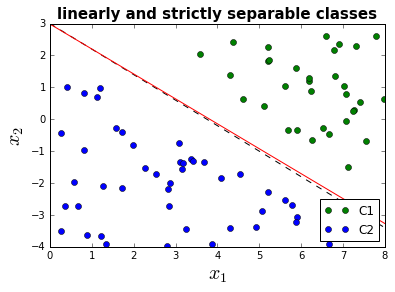

In [44]:
# CVX using simple classification

n = 2
X1 = np.concatenate((x1[C1], x2[C1]), axis = 1)
X2 = np.concatenate((x1[C2], x2[C2]), axis = 1)
X1 = np.asmatrix(X1)
X2 = np.asmatrix(X2)



N = X1.shape[0]
M = X2.shape[0]
w = cvx.Variable(n, 1)
w0 = cvx.Variable(1)
u = cvx.Variable(N, 1)
v = cvx.Variable(M, 1)
objective = cvx.Minimize(np.ones((1,N))*u + np.ones((1,M))*v)
constraint = [X1*w + w0 >= 1-u, X2*w + w0 <= -(1-v), u >= 0, v >= 0 ]
prob = cvx.Problem(objective, constraint)
prob.solve()

w = np.asarray(w.value)
w0 = np.asarray(w0.value)

xp = np.array([[x_cont/100.0 for x_cont in range(0,801)]])

yhat = - w[0]/w[1]*xp - w0/w[1]
p1 = yhat - 1/w[1]
p2 = yhat + 1/w[1]

plt.plot(X1[:, 0], X1[:, 1], 'go')
plt.plot(X2[:, 0], X2[:, 1], 'bo')
plt.plot(xp[0], yp, 'k--')
plt.plot(xp[0], yhat[0], 'r-')

plt.title('linearly and strictly separable classes', fontweight = 'bold', fontsize = 15)
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(('C1','C2'), loc = 4)
plt.xlim([0, 8])
plt.ylim([-4, 3])

plt.show()

## LP Formulation 2

- $n \;(=2)$ features

- $m = N+M$ data points in a training set

$$x^i = \begin{bmatrix} x_1^{(i)} \\ x_2^{(i)} \end{bmatrix}$$

- $N$ belongs to $C_1$ in training set

- $M$ belongs to $C_2$ in training set

- $\omega$ and $\omega_0$ are the variables (unknown)

- For the non-separable case, we <font color='green'>relex</font> the above constraints

- <font color='red'>Need slack variables $u$ and $\upsilon$ where all are positive</font>


__The optimization problem for the non-separable case__

$$\begin{align*} \text{minimize} \quad & \sum\limits_{i=1}^{N}u_i + \sum\limits_{i=1}^{M}\upsilon_i \\ \\
\text{subject to} \quad
& \begin{cases}
\omega^Tx^{(1)} + \omega_0 \geq1-u_1\\
\omega^Tx^{(2)} + \omega_0 \geq1-u_2\\
 \quad  \quad \vdots \\
\omega^Tx^{(N)} + \omega_0 \geq1-u_N\\
\end{cases} \\
& \begin{cases}
\omega^Tx^{(N+1)} + \omega_0 \leq{-(1-\upsilon_1)}\\
\omega^Tx^{(N+2)} + \omega_0 \leq{-(1-\upsilon_2)}\\
 \quad  \quad \vdots \\
\omega^Tx^{(N+M)} + \omega_0 \leq{-(1-\upsilon_M)}\\
\end{cases} \\
& \begin{cases}
u \geq 0\\
v \geq 0\\
\end{cases}
\end{align*}$$


- Expressed in a matrix form


$$\begin{align*} \text{minimize} \quad  & 1^Tu + 1^T\upsilon \\
\text{subject to} \quad
& X_1\omega + \omega_0 \geq 1-u \\
& X_2\omega + \omega_0 \leq -(1-\upsilon) \\
& u \geq 0 \\
& \upsilon \geq 0
\end{align*}$$
<br><br>

$$
\begin{align*} X_1 &= \begin{bmatrix} x^{(1)^T} \\ x^{(2)^T} \\ \vdots \\ x^{(N)^T}\end{bmatrix} =
\begin{bmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \\ 
\vdots & \vdots \\ x_1^{(N)} & x_2^{(N)} \\ 
\end{bmatrix}\\
X_2 &= \begin{bmatrix} x^{(N+1)^T} \\ x^{(N+2)^T} \\ \vdots \\ x^{(N+M)^T}\end{bmatrix} =
\begin{bmatrix} x_1^{(N+1)} & x_2^{(N+1)} \\ x_1^{(N+2)} & x_2^{(N+2)} \\ 
\vdots & \vdots \\ x_1^{(N+M)} & x_2^{(N+M)} \\ 
\end{bmatrix} \\
u &= \begin{bmatrix} 
u_1\\
\vdots\\
u_N\\
\end{bmatrix}\\
\upsilon &= \begin{bmatrix} 
\upsilon_{1}\\
\vdots\\
\upsilon_{M}\\
\end{bmatrix}
\end{align*}$$

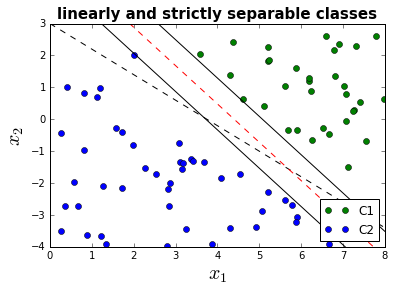

In [45]:
## CVX Support Vector Machine

outlier = np.array([[2, 2]]);
X2new = np.concatenate((X2, outlier), 0)

N = X1.shape[0]
M = X2new.shape[0]

w = cvx.Variable(n, 1)
w0 = cvx.Variable(1)
u = cvx.Variable(N, 1)
v = cvx.Variable(M, 1)

objective = cvx.Minimize(np.ones((1,N))*u + np.ones((1,M))*v)
constraint = [X1*w + w0 >= 1-u, X2new*w + w0 <= -(1-v), u >= 0, v >= 0 ]
prob = cvx.Problem(objective, constraint)
prob.solve()

w = np.asarray(w.value)
w0 = np.asarray(w0.value)

xp = np.array([[x_cont/100.0 for x_cont in range(0,801)]])

yhat = - w[0]/w[1]*xp - w0/w[1]
p1 = yhat - 1/w[1]
p2 = yhat + 1/w[1]

plt.plot(X1[:, 0], X1[:, 1], 'go')
plt.plot(X2new[:, 0], X2new[:, 1], 'bo')
plt.plot(xp[0], yp, 'k--')
plt.plot(xp[0], yhat[0], 'r--')
plt.plot(xp[0], p1[0], 'k')
plt.plot(xp[0], p2[0], 'k')

plt.title('linearly and strictly separable classes', fontweight = 'bold', fontsize = 15)
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(('C1','C2'), loc = 4)
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()


## Result 2 and further improvement

- Notice that red hyperplane is not as accurately represent the division due to the outlier


- Can we do better when there are noise data or outliers?


- Yes, but we need to look beyond LP


- Idea: large margin leads to good generalization on the test data

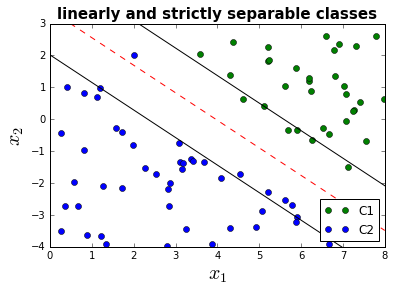

In [49]:
## CVX Support Vector Machine
outlier = np.array([[2, 2]]);


g = 0.1

X2new = np.concatenate((X2, outlier), 0)

N = X1.shape[0]
M = X2new.shape[0]

w = cvx.Variable(n, 1)
w0 = cvx.Variable(1)
u = cvx.Variable(N, 1)
v = cvx.Variable(M, 1)

objective = cvx.Minimize(cvx.norm2(w) + g*(np.ones((1,N))*u + np.ones((1,M))*v))
constraint = [X1*w + w0 >= 1-u, X2new*w + w0 <= -(1-v), u >= 0, v >= 0 ]
prob = cvx.Problem(objective, constraint)
prob.solve()

w = np.asarray(w.value)
w0 = np.asarray(w0.value)

xp = np.array([[x_cont/100.0 for x_cont in range(0,801)]])

yhat = - w[0]/w[1]*xp - w0/w[1]
p1 = yhat - 1/w[1]
p2 = yhat + 1/w[1]

plt.plot(X1[:, 0], X1[:, 1], 'go')
plt.plot(X2new[:, 0], X2new[:, 1], 'bo')
plt.plot(xp[0], yhat[0], 'r--')
plt.plot(xp[0], p1[0], 'k')
plt.plot(xp[0], p2[0], 'k')

plt.title('linearly and strictly separable classes', fontweight = 'bold', fontsize = 15)
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(('C1','C2'), loc = 4)
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()


## Maximize Margin (Finally, it is Support Vector Machine)

- Distance (= margin)

$$\text{margin} = \frac{2}{\lVert \omega \rVert _2}$$


- Minimize $\lVert \omega \rVert_2$ to maximize the margin


- Multiple objectives


- Use gamma ($\gamma$) as a weighting betwwen the followings:
    - Bigger margin given robustness to outliers
    - Hyperplane that has few (or no) errors


$$\begin{align*} \text{minimize} \quad 
& \lVert \omega \rVert_2 + \gamma(1^Tu + 1^T\upsilon) \\
\text{subject to} \quad
& X_1\omega + \omega_0 \geq 1-u \\
& X_2\omega + \omega_0 \leq -(1-\upsilon) \\
& u \geq 0 \\
& \upsilon \geq 0
\end{align*}$$



# 3. Support Vector Machine

- Probably the most popular/influential classification algorithm


- A hyperplane based classifier (like the Perceptron)


- Additionally uses the maximum margin principle
    - maximize distance (margin) of closest samples from the decision line
    <br><br>
    $$ \text{maximize {minimum distance}} $$
    <br>
    - note: perceptron only utilizes a sign of distance
    - Finds the hyperplane with maximum separation margin on the training data


$$\begin{align*} \text{minimize} \quad 
& \lVert \omega \rVert_2 + \gamma(1^Tu + 1^T\upsilon) \\
\text{subject to} \quad
& X_1\omega + \omega_0 \geq 1-u \\
& X_2\omega + \omega_0 \leq -(1-\upsilon) \\
& u \geq 0 \\
& \nu \geq 0
\end{align*}$$

- In a more compact form
<table style="border-style: hidden; border-collapse: collapse;" width = "50%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 20% style="border-style: hidden; border-collapse: collapse;">
             $$\begin{align*}\omega^T x_n + \omega_0 &\geq 1 \;\text{for }\; y_n = +1\\
                \omega^T x_n + \omega_0 &\leq -1 \;\text{for }\; y_n = -1 \end{align*}$$
        </td>
        <td width = 10% style="border-style: hidden; border-collapse: collapse;">
             $$ \Longleftrightarrow $$
        </td>
        <td width = 20%>
            $$y_n\left( \omega^T x_n + \omega_0 \right) \geq 1$$
        </td>
    </tr>
</table>

<br>
$$\begin{align*} \text{minimize} \quad 
& \lVert \omega \rVert_2 + \gamma(1^T \xi) \\
\text{subject to} \quad
& y_n\left( \omega^T x_n + \omega_0 \right) \geq 1 - \xi_n \\
& \xi \geq 0 \\
\end{align*}$$



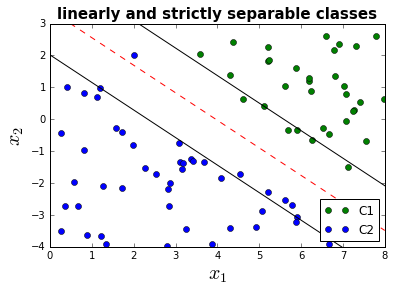

In [50]:
## CVX Support Vector Machine
outlier = np.array([[2, 2]]);


g = 0.1

X2new = np.concatenate((X2, outlier), 0)

N = X1.shape[0]
M = X2new.shape[0]

w = cvx.Variable(n, 1)
w0 = cvx.Variable(1)
u = cvx.Variable(N, 1)
v = cvx.Variable(M, 1)

objective = cvx.Minimize(cvx.norm2(w) + g*(np.ones((1,N))*u + np.ones((1,M))*v))
constraint = [X1*w + w0 >= 1-u, X2new*w + w0 <= -(1-v), u >= 0, v >= 0 ]
prob = cvx.Problem(objective, constraint)
prob.solve()

w = np.asarray(w.value)
w0 = np.asarray(w0.value)

xp = np.array([[x_cont/100.0 for x_cont in range(0,801)]])

yhat = - w[0]/w[1]*xp - w0/w[1]
p1 = yhat - 1/w[1]
p2 = yhat + 1/w[1]

plt.plot(X1[:, 0], X1[:, 1], 'go')
plt.plot(X2new[:, 0], X2new[:, 1], 'bo')
plt.plot(xp[0], yhat[0], 'r--')
plt.plot(xp[0], p1[0], 'k')
plt.plot(xp[0], p2[0], 'k')

plt.title('linearly and strictly separable classes', fontweight = 'bold', fontsize = 15)
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(('C1','C2'), loc = 4)
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()


### Minimum error classification as mixed integer programming (Optional)

From http://www.cs.cmu.edu/~zkolter/course/15-780-s14/ps2.pdf


In class,
we mentioned that we cannot efficiently find a linear classifier that minimizes 0/1 loss. That is, we cannot easily solve the optimization problem

$$ \min_{\theta} \; \sum_{i=1}^{m} 1 \{y_i\cdot h_{\theta}(x_i) < 0 \}$$

with optimization variables $\theta$, input data $(x_i, y_i)$, $i = 1, \cdots, m$ and where 1 denotes the indicator function (one if the argment is true and zero otherwise).

Show that we can, however, solve this problem as a binary mixed integer program. That is, write an optimization problem over the variables $\theta$ and $z$ with whatever (convex) objective and constraints you want, plus the additional constraint that $z_i \in \{0, 1\}$, such that the solution of this optimization problem gives the $\theta$ the minimizes 0/1 loss.


# 4. Nonlinear Support Vector Machine 

## Kernel
- Often we want to capture nonlinear patterns in the data
    - nonlinear regression: input and output relationship may not be linear
    - nonlinear classification: classes may note be separable by a linear boundary


- Linear models (e.g. linear regression, linear SVM) are note just rich enough


- Kernels: make linear model work in nonlinear settings
    - by mapping data to higher dimensions where it exhibits linear patterns
    - apply the linear model in the new input feature space
    - mapping $=$ changing the feature representation


- Note: such mappings can be expensive to compute in general
    - Kernels give such mappings for (almost) free
    - in most cases, the mappings need not be even computed
    - using the Kernel trick !


## Classifying non-linear separable data
- Consider the binary classification problem
    - each example represented by a single feature $x$
    - No linear separator exists for this data

<img src="./image_files/nonlinear_1D.png", width = 300>

- Now map each example as $x \rightarrow \{x,x^2\}$


- Data now becomes linearly separable in the new representation

<img src="./image_files/linear_2D.png", width = 300>

- Linear in the new representation $=$ nonlinear in the old representation

- Let's look at another example
    - Each example defined by a two features $x=\{x_1, x_2\}$
    - No linear separator exists for this data

<img src="./image_files/nonlinear_2D.png", width = 300>

- Now map each example as $x=\{x_1, x_2\} \rightarrow z=\{x_1^2,\sqrt{2}x_1x_2,x_2^2\}$
    - Each example now has three features (derived from the old represenation)


- Data now becomes linear separable in the new representation

<img src="./image_files/linear_3D.png", width = 300>

In [8]:
%%html
<iframe 
width="420" height="315" src="https://www.youtube.com/embed/3liCbRZPrZA" frameborder="0" allowfullscreen>
</iframe>

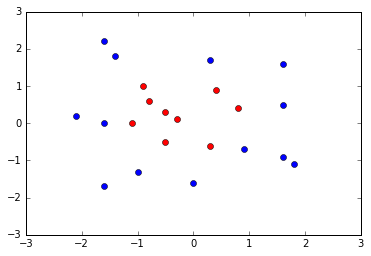

In [3]:
x_c1 = np.array([[-1.1,  0], [-0.3,  0.1], [-0.9,  1],[0.8,  0.4],[0.4,  0.9],[0.3,-0.6],[-0.5, 0.3],
        [-0.8,  0.6],[-0.5, -0.5]])
     
x_c2 = np.array([[-1,  -1.3], [-1.6 , 2.2],  [0.9, -0.7],[1.6,  0.5],[1.8, -1.1],[1.6,  1.6],[-1.6, -1.7],
[-1.4,  1.8],[1.6, -0.9],[0, -1.6],[0.3, 1.7],[-1.6 , 0],[-2.1,0.2]])

plt.plot(x_c1[:, 0], x_c1[:,1], 'ro')
plt.plot(x_c2[:, 0], x_c2[:,1], 'bo')
plt.axis([-3,3,-3,3])
plt.show()


In [4]:
c1n = x_c1.shape[0]
c2n = x_c2.shape[0]

x = np.concatenate((x_c1, x_c2), 0)
y = np.concatenate((np.ones((c1n, 1)), -np.ones((c2n, 1))), 0)


n = 3
m = c1n + c2n
g = 1

z = np.zeros((m, 3))

z[:, 0] = x[:, 0]**2
z[:, 1] = np.sqrt(2)*x[:,0]*x[:,1]
z[:, 2] = x[:,1]**2



w = cvx.Variable(n, 1)
w0 = cvx.Variable(1)
d = cvx.Variable(m, 1)



objective = cvx.Minimize(cvx.norm2(w) + g*np.matrix(np.ones((1, m)))*d)
constraint = [cvx.mul_elemwise(y,(np.matrix(z)*w + w0)) >= 1-d, d>=0]
prob = cvx.Problem(objective, constraint)
prob.solve()

w = np.asarray(w.value)
w0 = np.asarray(w0.value)

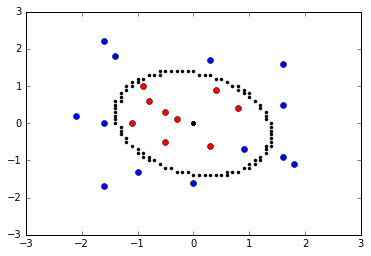

In [5]:
[X1g, X2g] = np.meshgrid([x1/10. for x1 in range(-30,31,1)],[x2/10. for x2 in range(-30,31,1)])

x_test = np.concatenate((X1g.reshape(X1g.shape[0]**2,1, order ="F"), X2g.reshape(X2g.shape[0]**2,1, order = "F")), 1)

z_test = np.zeros((x_test.shape[0],3))

z_test[:, 0] = x_test[:, 0]**2
z_test[:, 1] = np.sqrt(2)*x_test[:,0]*x_test[:,1]
z_test[:, 2] = x_test[:,1]**2

y_hat = z_test.dot(w) + w0

B = np.zeros((np.shape(y_hat)[0],2))

for i in range(0, y_hat.shape[0]):
    if np.abs(y_hat[i]) < 0.2: 
        B[i,:] = x_test[i,:]

plt.plot(x_c1[:, 0], x_c1[:,1], 'ro')
plt.plot(x_c2[:, 0], x_c2[:,1], 'bo')
plt.axis([-3,3,-3,3])
plt.plot(B[:, 0], B[:, 1], 'k.')
plt.show()

## Feature Mapping with Kernels (optional)

In [1]:
%%html
<iframe src="./image_files/07 print.pdf#view=fit", width=700 height=500></iframe>

In [2]:
%%html
<iframe src="./image_files/ml_nonlin_reg.pdf#view=fit", width=700 height=500></iframe>

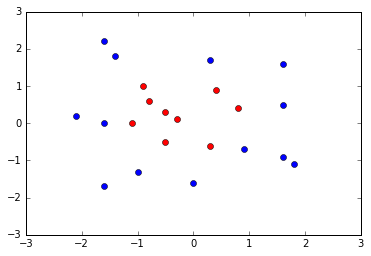

In [6]:
x_c1 = np.array([[-1.1,  0], [-0.3,  0.1], [-0.9,  1],[0.8,  0.4],[0.4,  0.9],[0.3,-0.6],[-0.5, 0.3],
        [-0.8,  0.6],[-0.5, -0.5]])
     
x_c2 = np.array([[-1,  -1.3], [-1.6 , 2.2],  [0.9, -0.7],[1.6,  0.5],[1.8, -1.1],[1.6,  1.6],[-1.6, -1.7],
[-1.4,  1.8],[1.6, -0.9],[0, -1.6],[0.3, 1.7],[-1.6 , 0],[-2.1,0.2]])

plt.plot(x_c1[:, 0], x_c1[:,1], 'ro')
plt.plot(x_c2[:, 0], x_c2[:,1], 'bo')
plt.axis([-3,3,-3,3])
plt.show()


## Polynomial function

In [7]:
c1n = x_c1.shape[0]
c2n = x_c2.shape[0]

X = np.concatenate((x_c1, x_c2), 0)
y = np.concatenate((np.ones((c1n, 1)), -np.ones((c2n, 1))), 0)


n = 3
m = c1n + c2n

d = 3

K =np.matrix((1 + X.dot(X.transpose()))**d)

g = 1

alp = cvx.Variable(m,1)
u = cvx.Variable(m,1)
objective = cvx.Minimize((0.5)*cvx.sum_entries(cvx.quad_form(alp, K)) + g*cvx.sum_entries(u))
constraint = [cvx.mul_elemwise(y,(K*alp)) >= 1-u, u>=0]
prob = cvx.Problem(objective, constraint)
prob.solve()

alp = np.asarray(alp.value)


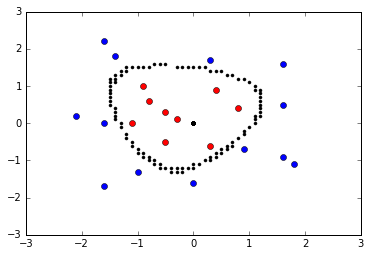

In [8]:
[Xg, Xg] = np.meshgrid([x1/10. for x1 in range(-20,21,1)],[x2/10. for x2 in range(-20,21,1)])

x_test = np.concatenate((X1g.reshape(X1g.shape[0]**2,1, order ="F"), X2g.reshape(X2g.shape[0]**2,1, order = "F")), 1)
k_test = (1 + x_test.dot(X.transpose()))**d

y_hat = k_test.dot(alp)

B = np.zeros((np.shape(y_hat)[0],2))

for i in range(0, y_hat.shape[0]):
    if np.abs(y_hat[i]) < 0.15: 
        B[i,:] = x_test[i,:]

plt.plot(x_c1[:, 0], x_c1[:,1], 'ro')
plt.plot(x_c2[:, 0], x_c2[:,1], 'bo')
plt.axis([-3,3,-3,3])
plt.plot(B[:, 0], B[:, 1], 'k.')
plt.show()

In [22]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>